In [21]:
#Imports
%matplotlib inline
import numpy as np
import re
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt


In [22]:
def parse_line(line):
    m = re.match("^pbkdf2-sha256/pbkdf2-sha256-(.+)\.txt:(ALICE|BOB):(OTS|FIPP|FDPP|SG|INP|ON|OUT):(\d+|\d\.\d+e\+\d+)\n",
            line)
    if m == None:
        print(line)
    size = int(float(m.group(1)))
    party = m.group(2)
    fpart = m.group(3)
    if "e" in m.group(4):
        time = int(float(m.group(4)))
    else:
        time = int(m.group(4))
    return (size, party, fpart, time)

In [27]:
#Write dictionary dt, means, stdevs
dt = defaultdict(dict)
filenames = ["results/{:d}_{:#02d}_{:s}.txt".format(sz, i, party) for i in range(1, 11) for party in
        ["ALICE", "BOB"] for sz in [1, 10, 100]]
for fn in filenames:
    with open(fn, "r") as f:
        for line in f:
            (size, party, fpart, time) = parse_line(line)
            if (size, party, fpart) in dt:
                dt[(size, party, fpart)].append(time)
            else:
                dt[(size, party, fpart)] = [time]

nonpw_alice_means = defaultdict(dict)
nonpw_alice_stdevs = defaultdict(dict)
pw_alice_means = defaultdict(dict)
pw_alice_stdevs = defaultdict(dict)
nonpw_bob_means = defaultdict(dict)
nonpw_bob_stdevs = defaultdict(dict)
pw_bob_means = defaultdict(dict)
pw_bob_stdevs = defaultdict(dict)
for size in [1, 10, 100]:
    NONPW = ["OTS", "FIPP", "FDPP", "ON"]
    PW = ["SG", "INP", "OUT"]
    nonpw_alice_means[size] = np.average([sum(l) for l in zip(*[dt[(size, "ALICE", fp)] for fp in NONPW])])
    nonpw_alice_stdevs[size] = np.std([sum(l) for l in zip(*[dt[(size, "ALICE", fp)] for fp in NONPW])])
    pw_alice_means[size] = np.average([sum(l) for l in zip(*[dt[(size, "ALICE", fp)] for fp in PW])])
    pw_alice_stdevs[size] = np.std([sum(l) for l in zip(*[dt[(size, "ALICE", fp)] for fp in PW])])
    nonpw_bob_means[size] = np.average([sum(l) for l in zip(*[dt[(size, "BOB", fp)] for fp in NONPW])])
    nonpw_bob_stdevs[size] = np.std([sum(l) for l in zip(*[dt[(size, "BOB", fp)] for fp in NONPW])])
    pw_bob_means[size] = np.average([sum(l) for l in zip(*[dt[(size, "BOB", fp)] for fp in PW])])
    pw_bob_stdevs[size] = np.std([sum(l) for l in zip(*[dt[(size, "BOB", fp)] for fp in PW])])


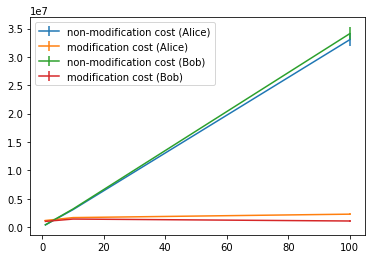

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = [1, 10, 100]
plt.errorbar(x, [nonpw_alice_means[sz] for sz in x], yerr=[nonpw_alice_stdevs[sz] for sz in x], 
             label='non-modification cost (Alice)')
plt.errorbar(x, [pw_alice_means[sz] for sz in x], yerr=[pw_alice_stdevs[sz] for sz in x], 
             label='modification cost (Alice)')
plt.errorbar(x, [nonpw_bob_means[sz] for sz in x], yerr=[nonpw_bob_stdevs[sz] for sz in x], 
             label='non-modification cost (Bob)')
plt.errorbar(x, [pw_bob_means[sz] for sz in x], yerr=[pw_bob_stdevs[sz] for sz in x], 
             label='modification cost (Bob)')
ax.legend()
plt.show()

In [36]:
for sz in [1, 10, 100]:
    nonpw_alice_means[sz] = nonpw_alice_means[sz] / 1000
    pw_alice_means[sz] = pw_alice_means[sz] / 1000
    nonpw_bob_means[sz] = nonpw_bob_means[sz] / 1000
    pw_bob_means[sz] = pw_bob_means[sz] / 1000
    nonpw_alice_stdevs[sz] = nonpw_alice_stdevs[sz] / 1000
    pw_alice_stdevs[sz] = pw_alice_stdevs[sz] / 1000
    nonpw_bob_stdevs[sz] = nonpw_bob_stdevs[sz] / 1000
    pw_bob_stdevs[sz] = pw_bob_stdevs[sz] / 1000

print(nonpw_alice_means)
print(pw_alice_means)
print(nonpw_bob_means)
print(pw_bob_means)

print(nonpw_alice_stdevs)
print(pw_alice_stdevs)
print(nonpw_bob_stdevs)
print(pw_bob_stdevs)

1161492.6 / 1000000

defaultdict(<class 'dict'>, {1: 389.8602, 10: 3084.3147000000004, 100: 33040.7402})
defaultdict(<class 'dict'>, {1: 1161.4926, 10: 1673.246, 100: 2278.5095})
defaultdict(<class 'dict'>, {1: 402.51590000000004, 10: 3194.8113, 100: 34106.1559})
defaultdict(<class 'dict'>, {1: 1003.8154000000001, 10: 1417.17, 100: 1072.5995})
defaultdict(<class 'dict'>, {1: 7.760078566612583, 10: 34.49999377985451, 100: 1089.104427792285})
defaultdict(<class 'dict'>, {1: 14.01009194973395, 10: 15.738124945494619, 100: 175.85061847900906})
defaultdict(<class 'dict'>, {1: 7.269978052924231, 10: 33.6305227317388, 100: 1126.5165023040229})
defaultdict(<class 'dict'>, {1: 15.365810315111926, 10: 17.978620080528984, 100: 134.1363605054573})


1.1614926